In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Sütunlar ve Anlamları:
Yıl (Yil): Verilerin ait olduğu yıl (2012).
İl Kodu (Il Kodu): İlin tanımlandığı kod.
İl (il): İlin adı.
İlçe Kodu (ilce_kodu): İlçenin tanımlandığı kod.
İlçe Adı (ilce_adi): İlçenin adı.
Ürün Adı (urun_adi): Ürünün türü ve üretim şekli (örneğin, Buğday (Durum) Kuru).
Ekilen Alan (dekar): Ekilen alanın büyüklüğü (dekar cinsinden).
Hasat Edilen Alan (dekar): Hasat edilen alanın büyüklüğü (dekar cinsinden).
Üretim Miktarı (ton) (Uretim Miktari (ton)): Üretim miktarı (ton cinsinden).
Verim (Kg/Dekar): Bir dekar başına elde edilen verim (kg cinsinden).
Rakım (m) (Rakim (m)): Üretim alanının deniz seviyesinden yüksekliği (metre cinsinden).
Ortalama Sıcaklık (°C) (Ortalama Sicaklik (°C)): Üretim alanının ortalama sıcaklığı (Celsius cinsinden).
Nem Oranı (%) (Nem Orani (%)): Üretim alanının ortalama nem oranı (yüzde cinsinden).
Yağış Oranı (mm) (Yagis Orani (mm)): Üretim alanının yıllık yağış miktarı (milimetre cinsinden).
Güneş Işığı (saat/gün) (Gunes Isigi (saat/gun)): Üretim alanının günlük ortalama güneş ışığı süresi (saat cinsinden).

### Veri Setinin Genel Özellikleri:
Yıl: Tüm veriler 2012 yılına ait.
İl ve İlçe: Veriler, Türkiye'nin farklı illerinden ve bu illere bağlı çeşitli ilçelerden toplanmış.
Ürün Türü ve Üretim Şekli: Buğday (Durum ve Diğer) üretiminin kuru ve sulu tarım yöntemleriyle yapılmış olması.
Tarım Alanları: Ekilen ve hasat edilen alanların büyüklükleri değişkenlik göstermekte.
Üretim Verimliliği: Dekar başına alınan ürün miktarı (verim) farklılık göstermekte.
Çevresel Faktörler: Rakım, sıcaklık, nem, yağış ve güneş ışığı gibi çevresel faktörler her il ve ilçeye göre farklılık göstermekte.

In [2]:
df =  pd.read_csv('/kaggle/input/turkey-wheat-production-data-2012/bugday_2012.csv')
df.head()

,Yıl,İl Kodu,il,ilce_kodu,ilce_adi,urun_adi,Ekilen Alan(dekar),Hasat Edilen Alan(dekar),Üretim Miktari(ton),Verim (Kg/Dekar),Rakım (m),Ortalama Sıcaklık (°C),Nem Oranı (%),Yağış Oranı (mm),Güneş Işığı (saat/gün)
0,2012,1,ADANA,1,SEYHAN,Buğday (Durum) Kuru,NaN,NaN,NaN,300,28,18.7,66,625.0,9.0
1,2012,1,ADANA,1,SEYHAN,Buğday (Durum) Sulu,NaN,NaN,NaN,500,28,18.7,66,625.0,9.0
2,2012,1,ADANA,1,SEYHAN,Buğday (Diğer) Kuru,0.0,0.0,0.0,300,28,18.7,66,625.0,9.0
3,2012,1,ADANA,1,SEYHAN,Buğday (Diğer) Sulu,10000.0,10000.0,5000.0,500,28,18.7,66,625.0,9.0
4,2012,1,ADANA,2,YÜREĞİR,Buğday (Durum) Kuru,NaN,NaN,NaN,324,28,18.7,66,625.0,9.0


In [3]:
def replace_turkish_characters(text):
    replacements = {
        'ş': 's', 'Ş': 'S', 'ı': 'i', 'İ': 'I', 'ç': 'c', 'Ç': 'C', 
        'ü': 'u', 'Ü': 'U', 'ö': 'o', 'Ö': 'O', 'ğ': 'g', 'Ğ': 'G'
    }
    for turkish_char, non_turkish_char in replacements.items():
        text = text.replace(turkish_char, non_turkish_char)
    return text


df.columns = [replace_turkish_characters(col) for col in df.columns]


df = df.applymap(lambda x: replace_turkish_characters(x) if isinstance(x, str) else x)

df.head()

,Yil,Il Kodu,il,ilce_kodu,ilce_adi,urun_adi,Ekilen Alan(dekar),Hasat Edilen Alan(dekar),Uretim Miktari(ton),Verim (Kg/Dekar),Rakim (m),Ortalama Sicaklik (°C),Nem Orani (%),Yagis Orani (mm),Gunes Isigi (saat/gun)
0,2012,1,ADANA,1,SEYHAN,Bugday (Durum) Kuru,NaN,NaN,NaN,300,28,18.7,66,625.0,9.0
1,2012,1,ADANA,1,SEYHAN,Bugday (Durum) Sulu,NaN,NaN,NaN,500,28,18.7,66,625.0,9.0
2,2012,1,ADANA,1,SEYHAN,Bugday (Diger) Kuru,0.0,0.0,0.0,300,28,18.7,66,625.0,9.0
3,2012,1,ADANA,1,SEYHAN,Bugday (Diger) Sulu,10000.0,10000.0,5000.0,500,28,18.7,66,625.0,9.0
4,2012,1,ADANA,2,YUREGIR,Bugday (Durum) Kuru,NaN,NaN,NaN,324,28,18.7,66,625.0,9.0


### 1. İl ve İlçelere Göre Üretim Verimliliği Analizi
Aşağıdaki grafikte, 2012 yılında Türkiye'de en yüksek ortalama verime sahip ilk 20 ilçe gösterilmiştir. Her bir bar, ilgili ilçenin ortalama verimini (kg/dekar) temsil etmektedir.

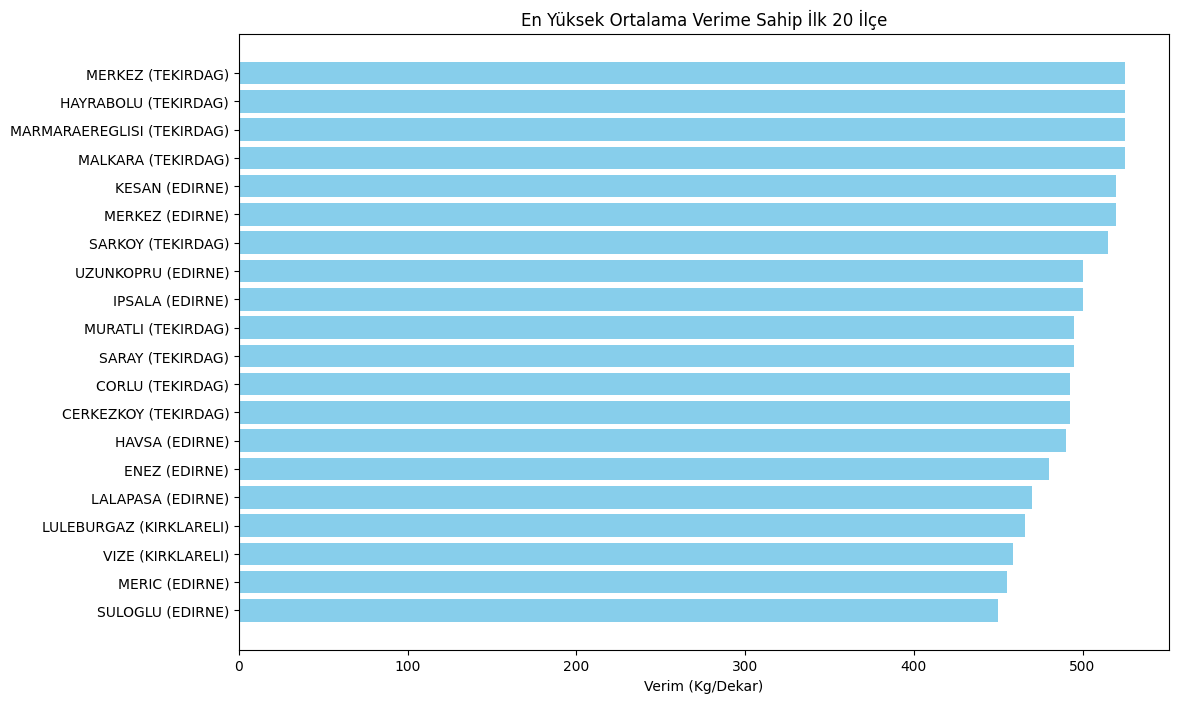

In [38]:
# İl ve İlçelere Göre Ortalama Verim (Kg/Dekar) Hesaplama
avg_yield_per_district = df.groupby(['il', 'ilce_adi'])['Verim (Kg/Dekar)'].mean().reset_index()
avg_yield_per_district = avg_yield_per_district.sort_values(by='Verim (Kg/Dekar)', ascending=False)

# İlk 20 ilçeyi seçelim görselleştirme için
top_20_districts = avg_yield_per_district.head(20)

# Bar grafiği ile görselleştirme
plt.figure(figsize=(12, 8))
plt.barh(top_20_districts['ilce_adi'] + " (" + top_20_districts['il'] + ")", top_20_districts['Verim (Kg/Dekar)'], color='skyblue')
plt.xlabel('Verim (Kg/Dekar)')
plt.title('En Yüksek Ortalama Verime Sahip İlk 20 İlçe')
plt.gca().invert_yaxis()  # En yüksek verim en üstte olacak şekilde sıralama
plt.show()

### 2. Ürün Türüne Göre Karşılaştırma
Grafikte, 2012 yılında Türkiye'de farklı buğday türleri ve üretim yöntemleri için ortalama verimlilik değerleri dört ana kategoriye göre gösterilmiştir. Her bir bar, ilgili ürün türü ve üretim şeklinin ortalama verimini (kg/dekar) temsil etmektedir:

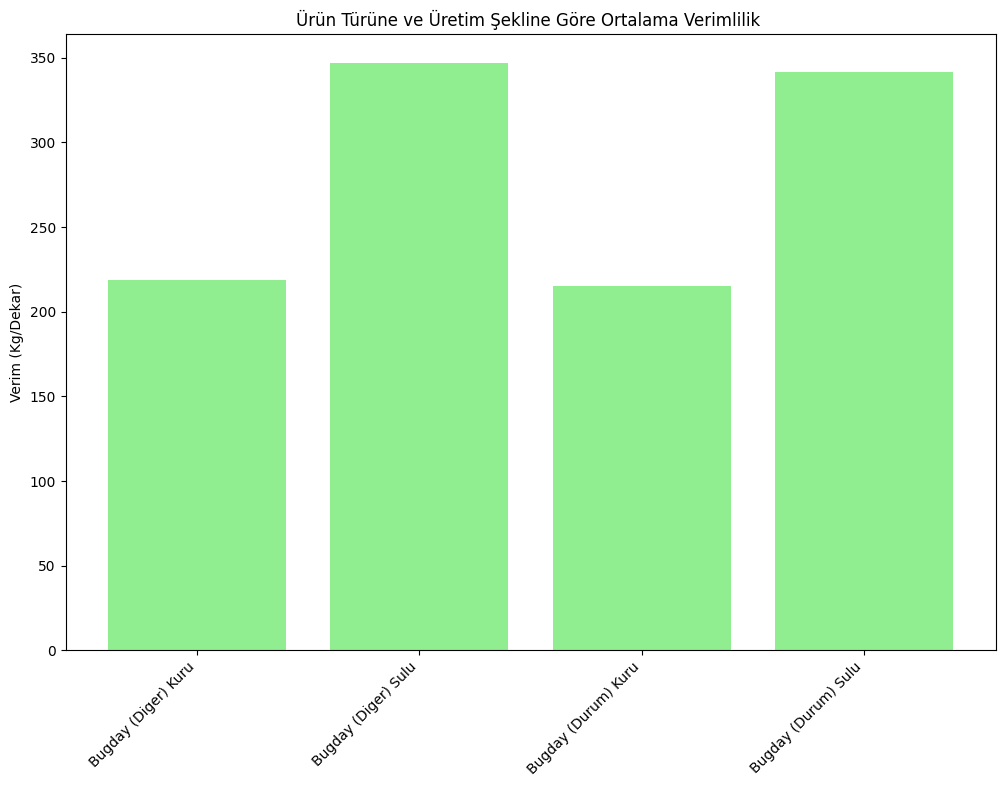

In [39]:
# Ürün türlerinin yazım farklarını düzeltecek şekilde verileri güncelleyelim
df['urun_adi'] = df['urun_adi'].replace({
    'Bugday (Durum) kuru': 'Bugday (Durum) Kuru',
    'Bugday (Durum) sulu': 'Bugday (Durum) Sulu',
    'Bugday (Diger) sulu': 'Bugday (Diger) Sulu'
})

# Ürün Türüne ve Üretim Şekline Göre Ortalama Verimlilik Hesaplama (düzeltme sonrası)
avg_yield_per_product_corrected = df.groupby('urun_adi')['Verim (Kg/Dekar)'].mean().reset_index()

# Bar grafiği ile görselleştirme (dört ürün türü olacak şekilde)
plt.figure(figsize=(12, 8))
plt.bar(avg_yield_per_product_corrected['urun_adi'], avg_yield_per_product_corrected['Verim (Kg/Dekar)'], color='lightgreen')
plt.ylabel('Verim (Kg/Dekar)')
plt.title('Ürün Türüne ve Üretim Şekline Göre Ortalama Verimlilik ')
plt.xticks(rotation=45, ha='right')
plt.show()



### 3. Çevresel Faktörlerin Etkisi
Aşağıdaki dört scatter plot (dağılım grafiği), çevresel faktörlerin (ortalama sıcaklık, nem oranı, yağış oranı ve güneş ışığı) buğday verimliliği üzerindeki etkilerini göstermektedir. Her bir nokta, bir il veya ilçedeki verimlilik değerini ve ilgili çevresel faktörü temsil eder.

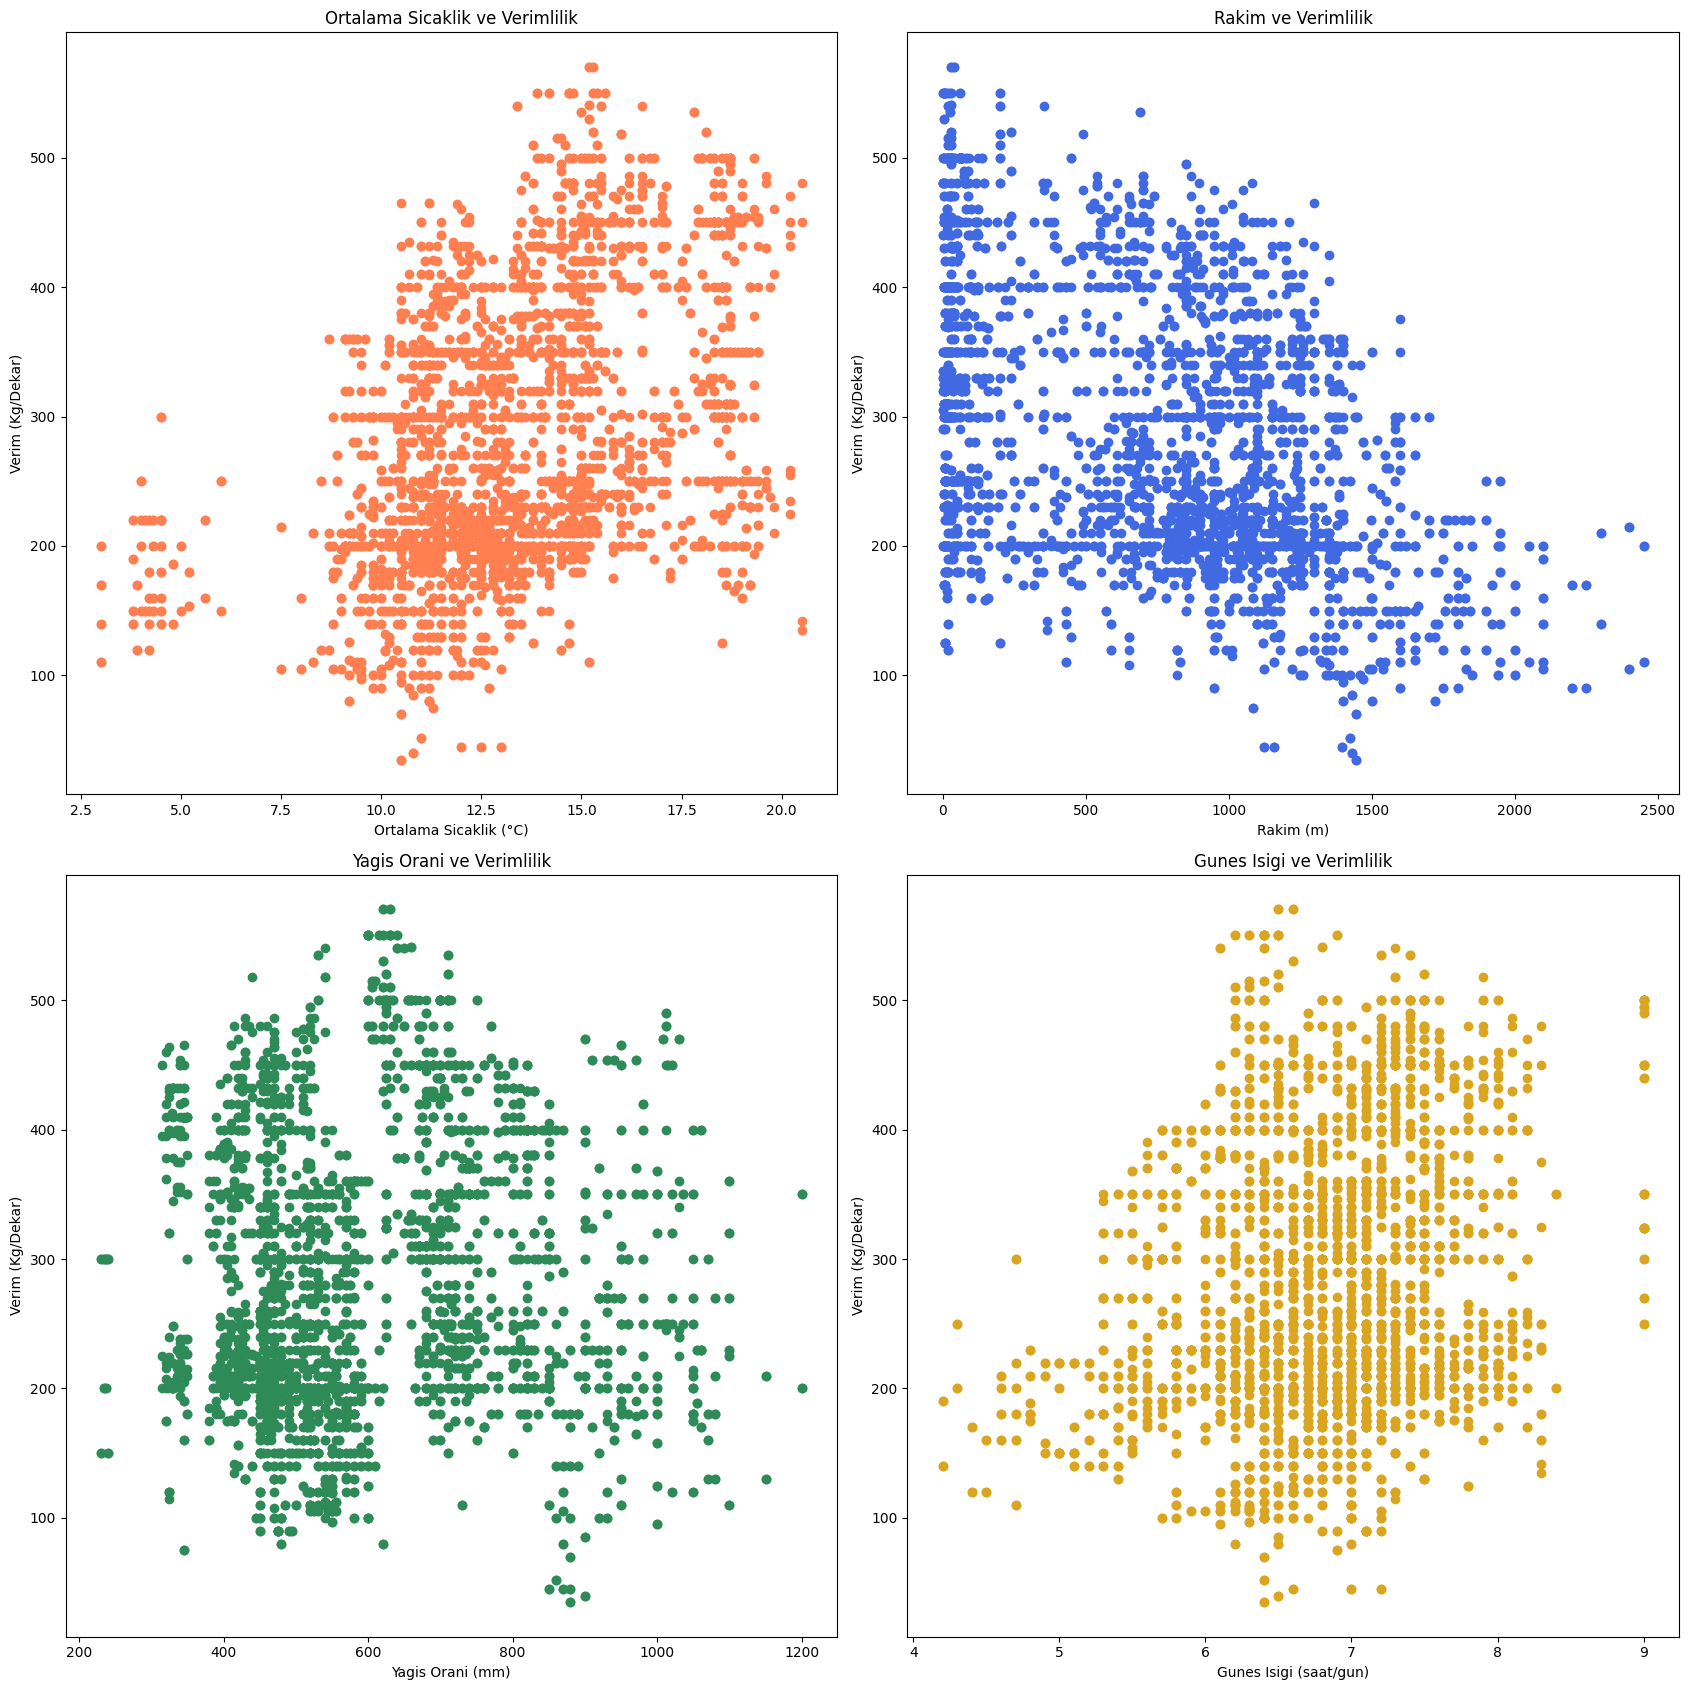

In [42]:
# Çevresel faktörler ve verimlilik arasındaki ilişkiyi görselleştirme
fig, axes = plt.subplots(2, 2, figsize=(17, 17))

# Ortalama Sıcaklık (°C) ve Verimlilik
axes[0, 0].scatter(df['Ortalama Sicaklik (°C)'], df['Verim (Kg/Dekar)'], color='coral')
axes[0, 0].set_xlabel('Ortalama Sicaklik (°C)')
axes[0, 0].set_ylabel('Verim (Kg/Dekar)')
axes[0, 0].set_title('Ortalama Sicaklik ve Verimlilik')

# Nem Oranı (%) ve Verimlilik
axes[0, 1].scatter(df['Rakim (m)'], df['Verim (Kg/Dekar)'], color='royalblue')
axes[0, 1].set_xlabel('Rakim (m)')
axes[0, 1].set_ylabel('Verim (Kg/Dekar)')
axes[0, 1].set_title('Rakim ve Verimlilik')

# Yağış Oranı (mm) ve Verimlilik
axes[1, 0].scatter(df['Yagis Orani (mm)'], df['Verim (Kg/Dekar)'], color='seagreen')
axes[1, 0].set_xlabel('Yagis Orani (mm)')
axes[1, 0].set_ylabel('Verim (Kg/Dekar)')
axes[1, 0].set_title('Yagis Orani ve Verimlilik')

# Güneş Işığı (saat/gün) ve Verimlilik
axes[1, 1].scatter(df['Gunes Isigi (saat/gun)'], df['Verim (Kg/Dekar)'], color='goldenrod')
axes[1, 1].set_xlabel('Gunes Isigi (saat/gun)')
axes[1, 1].set_ylabel('Verim (Kg/Dekar)')
axes[1, 1].set_title('Gunes Isigi ve Verimlilik')

plt.tight_layout()
plt.show()


### 5. Üretim Miktarlarının Dağılımı
Yukarıdaki grafikte, 2012 yılında Türkiye'de en yüksek toplam üretim miktarına sahip ilk 20 ilçe gösterilmiştir. Her bir bar, ilgili ilçenin toplam buğday üretim miktarını (ton cinsinden) temsil etmektedir.

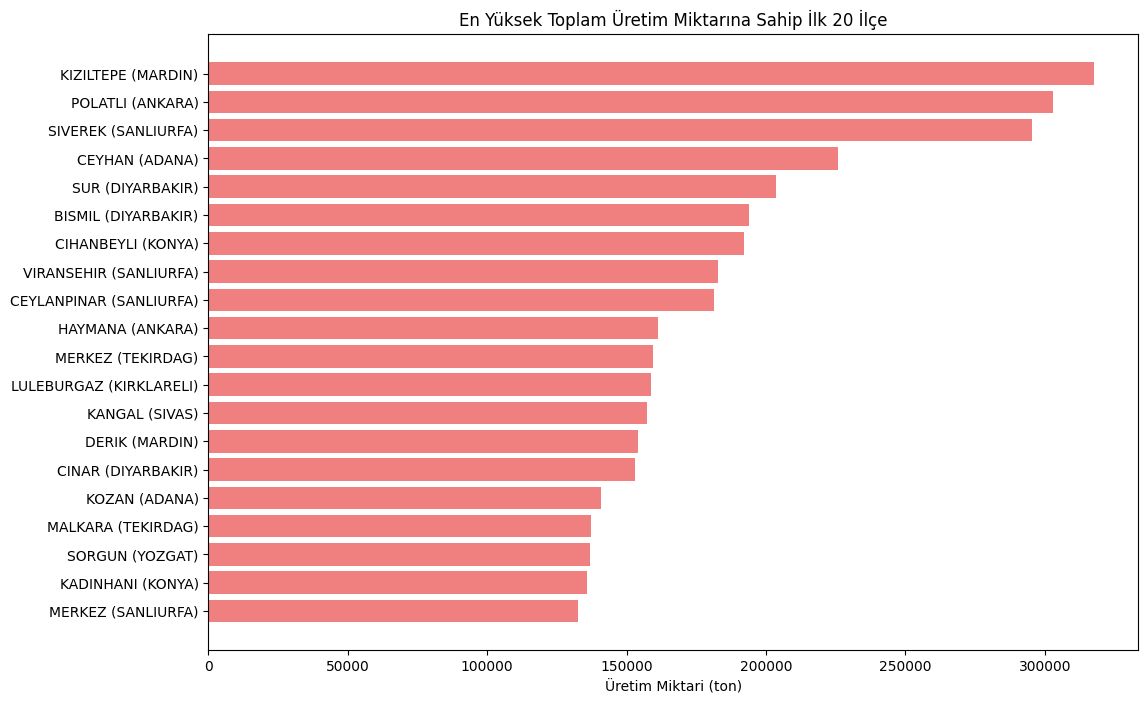

In [43]:
# İl ve İlçelere Göre Toplam Üretim Miktarı (ton) Hesaplama
total_production_per_district = df.groupby(['il', 'ilce_adi'])['Uretim Miktari(ton)'].sum().reset_index()
total_production_per_district = total_production_per_district.sort_values(by='Uretim Miktari(ton)', ascending=False)

# İlk 20 ilçeyi seçelim görselleştirme için
top_20_production_districts = total_production_per_district.head(20)

# Bar grafiği ile görselleştirme
plt.figure(figsize=(12, 8))
plt.barh(top_20_production_districts['ilce_adi'] + " (" + top_20_production_districts['il'] + ")", top_20_production_districts['Uretim Miktari(ton)'], color='lightcoral')
plt.xlabel('Üretim Miktari (ton)')
plt.title('En Yüksek Toplam Üretim Miktarına Sahip İlk 20 İlçe')
plt.gca().invert_yaxis()  # En yüksek üretim miktarı en üstte olacak şekilde sıralama
plt.show()

## Model

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413 entries, 0 to 3412
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Yil                       3413 non-null   int64  
 1   Il Kodu                   3413 non-null   int64  
 2   il                        3413 non-null   object 
 3   ilce_kodu                 3413 non-null   int64  
 4   ilce_adi                  3413 non-null   object 
 5   urun_adi                  3413 non-null   object 
 6   Ekilen Alan(dekar)        2301 non-null   float64
 7   Hasat Edilen Alan(dekar)  2301 non-null   float64
 8   Uretim Miktari(ton)       2301 non-null   float64
 9   Verim (Kg/Dekar)          3413 non-null   int64  
 10  Rakim (m)                 3413 non-null   int64  
 11  Ortalama Sicaklik (°C)    3413 non-null   float64
 12  Nem Orani (%)             3413 non-null   int64  
 13  Yagis Orani (mm)          3413 non-null   float64
 14  Gunes Is

In [4]:
df.describe()

,Yil,Il Kodu,ilce_kodu,Ekilen Alan(dekar),Hasat Edilen Alan(dekar),Uretim Miktari(ton),Verim (Kg/Dekar),Rakim (m),Ortalama Sicaklik (°C),Nem Orani (%),Yagis Orani (mm),Gunes Isigi (saat/gun)
count,3413.0,3413.000000,3413.000000,2301.000000,2301.000000,2301.000000,3413.000000,3413.000000,3413.000000,3413.000000,3413.000000,3413.000000
mean,2012.0,35.908585,7.135658,32723.335072,32688.793133,8735.332464,280.492529,754.099619,13.375535,65.085555,618.985350,6.799619
std,0.0,21.713561,6.320944,66781.818980,66763.297578,19300.941017,105.608491,553.271545,3.112582,5.737544,180.248378,0.735853
min,2012.0,1.000000,0.000000,0.000000,0.000000,0.000000,35.000000,0.000000,3.000000,52.000000,230.000000,4.200000
25%,2012.0,18.000000,3.000000,1079.000000,1079.000000,294.000000,200.000000,125.000000,11.200000,61.000000,475.000000,6.400000
50%,2012.0,35.000000,6.000000,8537.000000,8537.000000,2122.000000,250.000000,830.000000,13.200000,65.000000,570.000000,6.800000
75%,2012.0,54.000000,10.000000,34500.000000,34500.000000,7990.000000,352.000000,1155.000000,15.200000,68.000000,730.000000,7.300000
max,2012.0,81.000000,39.000000,1000000.000000,1000000.000000,260000.000000,570.000000,2450.000000,20.500000,82.000000,1200.000000,9.000000


In [46]:
# Eksik veya anormal değerleri kontrol edelim
missing_values = df.isnull().sum()
df.isnull().sum()

Yil                            0
Il Kodu                        0
il                             0
ilce_kodu                      0
ilce_adi                       0
urun_adi                       0
Ekilen Alan(dekar)          1112
Hasat Edilen Alan(dekar)    1112
Uretim Miktari(ton)         1112
Verim (Kg/Dekar)               0
Rakim (m)                      0
Ortalama Sicaklik (°C)         0
Nem Orani (%)                  0
Yagis Orani (mm)               0
Gunes Isigi (saat/gun)         0
dtype: int64

In [13]:
# Eksik değerlerin özet tablosunu oluşturalım
missing_values_summary = pd.DataFrame(missing_values, columns=['Eksik Değer Sayısı'])
missing_values_summary = missing_values_summary[missing_values_summary['Eksik Değer Sayısı'] > 0]

In [47]:
# Eksik değerleri ortalama ile dolduralım
df['Ekilen Alan(dekar)'] = df['Ekilen Alan(dekar)'].fillna(df['Ekilen Alan(dekar)'].mean())
df['Hasat Edilen Alan(dekar)'] = df['Hasat Edilen Alan(dekar)'].fillna(df['Hasat Edilen Alan(dekar)'].mean())
df['Uretim Miktari(ton)'] = df['Uretim Miktari(ton)'].fillna(df['Uretim Miktari(ton)'].mean())

# Eksik değerlerin tekrar kontrolü
missing_values_after = df.isnull().sum()
df.isnull().sum()

Yil                         0
Il Kodu                     0
il                          0
ilce_kodu                   0
ilce_adi                    0
urun_adi                    0
Ekilen Alan(dekar)          0
Hasat Edilen Alan(dekar)    0
Uretim Miktari(ton)         0
Verim (Kg/Dekar)            0
Rakim (m)                   0
Ortalama Sicaklik (°C)      0
Nem Orani (%)               0
Yagis Orani (mm)            0
Gunes Isigi (saat/gun)      0
dtype: int64

### One-Hot Encoding kullanarak kategorik verileri kodlayalım. 

Kategorik verileri One-Hot Encoding yöntemi ile sayısal değerlere dönüştürdük. Artık her kategorik değişkenin kendi sütunları var ve bunlar binary (0 veya 1) değerlerle temsil ediliyor.

0: BUĞDAY (DIĞER) KURU
1: BUĞDAY (DIĞER) SULU
2: BUĞDAY (DURUM) KURU
3: BUĞDAY (DURUM) SULU

In [5]:
# Convert all text to uppercase to unify the entries and then reassign category codes
df['urun_adi'] = df['urun_adi'].str.upper()
df['urun_adi_num'] = df['urun_adi'].astype('category').cat.codes

# Display the updated dataset
df.head()

,Yil,Il Kodu,il,ilce_kodu,ilce_adi,urun_adi,Ekilen Alan(dekar),Hasat Edilen Alan(dekar),Uretim Miktari(ton),Verim (Kg/Dekar),Rakim (m),Ortalama Sicaklik (°C),Nem Orani (%),Yagis Orani (mm),Gunes Isigi (saat/gun),urun_adi_num
0,2012,1,ADANA,1,SEYHAN,BUGDAY (DURUM) KURU,NaN,NaN,NaN,300,28,18.7,66,625.0,9.0,2
1,2012,1,ADANA,1,SEYHAN,BUGDAY (DURUM) SULU,NaN,NaN,NaN,500,28,18.7,66,625.0,9.0,3
2,2012,1,ADANA,1,SEYHAN,BUGDAY (DIGER) KURU,0.0,0.0,0.0,300,28,18.7,66,625.0,9.0,0
3,2012,1,ADANA,1,SEYHAN,BUGDAY (DIGER) SULU,10000.0,10000.0,5000.0,500,28,18.7,66,625.0,9.0,1
4,2012,1,ADANA,2,YUREGIR,BUGDAY (DURUM) KURU,NaN,NaN,NaN,324,28,18.7,66,625.0,9.0,2


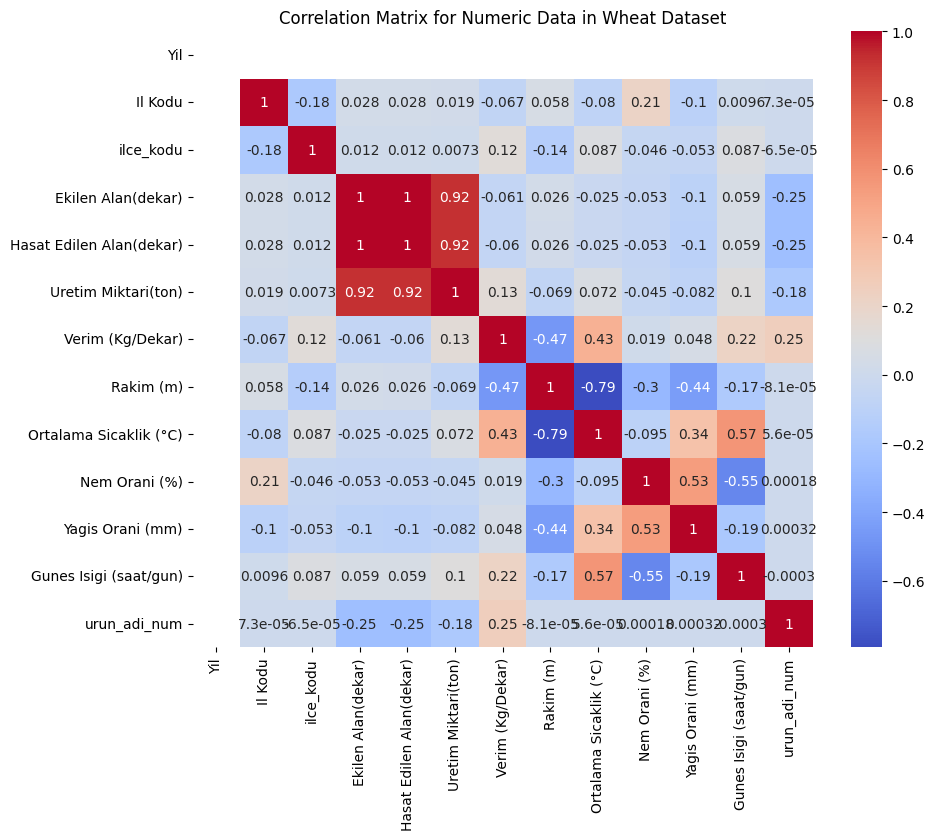

In [6]:
# Remove non-numeric columns for correlation analysis
numeric_data = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numeric columns only
correlation_matrix_numeric = numeric_data.corr()

# Plot the heatmap for the numeric data
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Data in Wheat Dataset')
plt.show()


In [8]:
df2 = df.drop(columns=['il', 'Yil','ilce_adi','Il Kodu','ilce_kodu','urun_adi','Ekilen Alan(dekar)','Hasat Edilen Alan(dekar)','Uretim Miktari(ton)'])

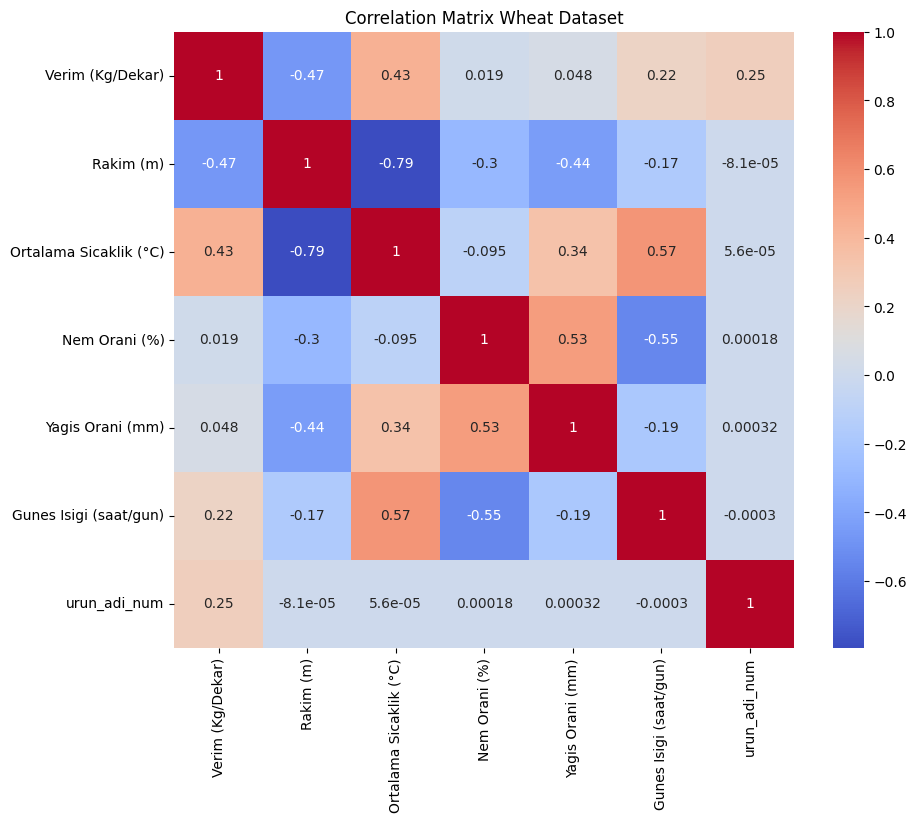

In [9]:
# Compute the correlation matrix for numeric columns only
df2_corr = df2.corr()

# Plot the heatmap for the numeric data
plt.figure(figsize=(10, 8))
sns.heatmap(df2_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Wheat Dataset')
plt.show()


In [10]:
# Normalleştirme/Standartlaştırma için sayısal sütunları seçelim
numeric_columns = [
    'Verim (Kg/Dekar)','urun_adi_num', 'Rakim (m)', 'Ortalama Sicaklik (°C)',
    'Nem Orani (%)', 'Yagis Orani (mm)', 'Gunes Isigi (saat/gun)'
]

# Standartlaştırma işlemi
scaler = StandardScaler()
df2[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [53]:
df2

,Verim (Kg/Dekar),Rakim (m),Ortalama Sicaklik (°C),Nem Orani (%),Yagis Orani (mm),Gunes Isigi (saat/gun),urun_adi_num
0,0.184742,-1.312567,1.710877,0.159402,0.033374,2.990683,0.446925
1,2.078807,-1.312567,1.710877,0.159402,0.033374,2.990683,1.341038
2,0.184742,-1.312567,1.710877,0.159402,0.033374,2.990683,-1.341300
3,2.078807,-1.312567,1.710877,0.159402,0.033374,2.990683,-0.447187
4,0.412030,-1.312567,1.710877,0.159402,0.033374,2.990683,0.446925
...,...,...,...,...,...,...,...
3408,-0.288774,-1.146259,0.232788,1.728248,1.892192,-1.494565,-1.341300
3409,0.184742,-1.146259,0.232788,1.728248,1.892192,-1.494565,-0.447187
3410,-0.099368,-1.001643,0.072126,1.902564,2.391577,-2.038231,0.446925
3411,0.184742,-1.001643,0.072126,1.902564,2.391577,-2.038231,1.341038


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Hedef değişkeni ve bağımsız değişkenleri belirleyelim
X = df2.drop(columns=['Verim (Kg/Dekar)'])
y = df2['Verim (Kg/Dekar)']

# Veri setini eğitim ve test seti olarak bölelim (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim ve test setinin boyutlarını kontrol edelim
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((2730, 6), (683, 6), (2730,), (683,))

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Modeli oluştur ve eğit
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yap
y_rf_pred = rf_model.predict(X_test)

# Model performansını değerlendirme
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

print('mse',mse_rf)
print('r2',r2_rf)

mse 0.23597910032152739
r2 0.7577262764616131


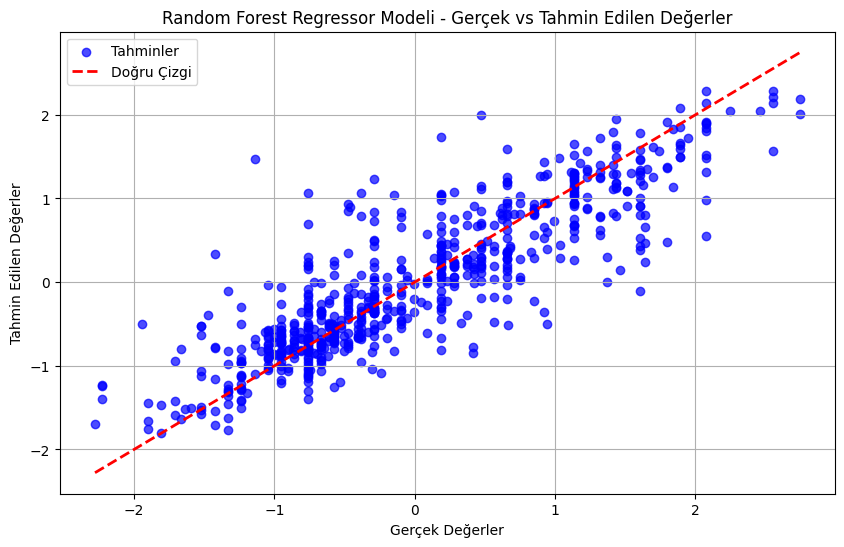

In [56]:
import matplotlib.pyplot as plt

# Gerçek ve tahmin edilen değerleri karşılaştırmak için bir grafik çizelim
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_rf_pred, alpha=0.7, color='b', label='Tahminler')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', lw=2, linestyle='--', label='Doğru Çizgi')

plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Random Forest Regressor Modeli - Gerçek vs Tahmin Edilen Değerler')
plt.legend()
plt.grid(True)
plt.show()


In [57]:
from sklearn.svm import SVR

# Support Vector Regressor modelini oluşturma ve eğitme
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yap
y_svr_pred = svr_model.predict(X_test)

# Model performansını değerlendirme
mse_svr = mean_squared_error(y_test, y_svr_pred)
r2_svr = r2_score(y_test, y_svr_pred)

print('mse',mse_svr)
print('r2',r2_svr)

mse 0.34452556162412534
r2 0.6462843931725244


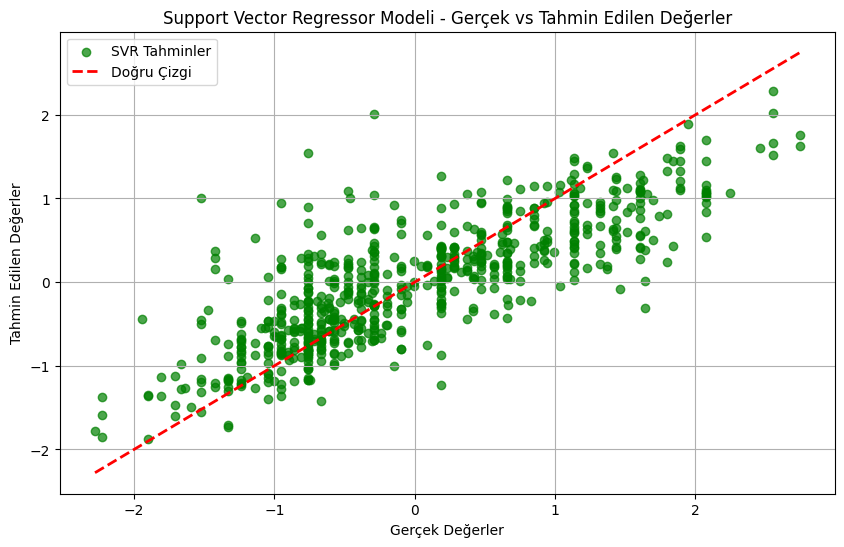

In [58]:
# Gerçek ve tahmin edilen değerleri karşılaştırmak için bir grafik çizelim
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_svr_pred, alpha=0.7, color='g', label='SVR Tahminler')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', lw=2, linestyle='--', label='Doğru Çizgi')

plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Support Vector Regressor Modeli - Gerçek vs Tahmin Edilen Değerler')
plt.legend()
plt.grid(True)
plt.show()


In [59]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor modelini oluşturma ve eğitme
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yap
y_gbr_pred = gbr_model.predict(X_test)

# Model performansını değerlendirme
mse_gbr = mean_squared_error(y_test, y_gbr_pred)
r2_gbr = r2_score(y_test, y_gbr_pred)

print('mse',mse_gbr)
print('r2',r2_gbr)

mse 0.2265761416032003
r2 0.7673800543506841


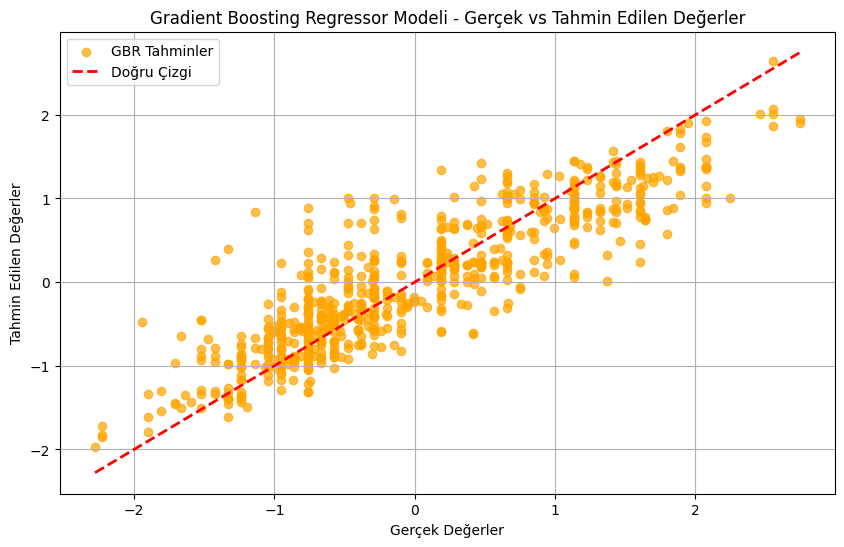

In [60]:
# Gerçek ve tahmin edilen değerleri karşılaştırmak için bir grafik çizelim
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_gbr_pred, alpha=0.7, color='orange', label='GBR Tahminler')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', lw=2, linestyle='--', label='Doğru Çizgi')

plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gradient Boosting Regressor Modeli - Gerçek vs Tahmin Edilen Değerler')
plt.legend()
plt.grid(True)
plt.show()


In [61]:
from sklearn.neighbors import KNeighborsRegressor

# K-Nearest Neighbors Regressor modelini oluşturma ve eğitme
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yap
y_knn_pred = knn_model.predict(X_test)

# Model performansını değerlendirme
mse_knn = mean_squared_error(y_test, y_knn_pred)
r2_knn = r2_score(y_test, y_knn_pred)

print('mse',mse_knn)
print('r2',r2_knn)

mse 0.2408189142083764
r2 0.7527573629857923


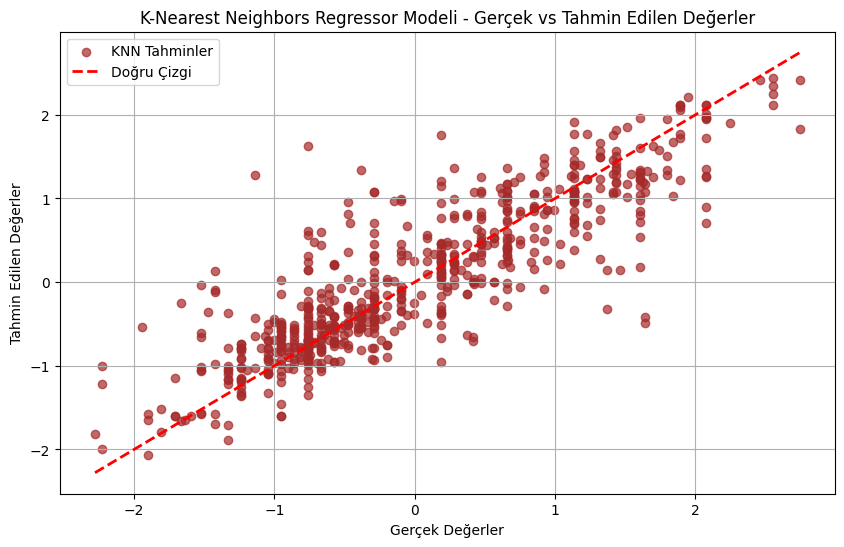

In [62]:
# Gerçek ve tahmin edilen değerleri karşılaştırmak için bir grafik çizelim
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_knn_pred, alpha=0.7, color='brown', label='KNN Tahminler')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', lw=2, linestyle='--', label='Doğru Çizgi')

plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('K-Nearest Neighbors Regressor Modeli - Gerçek vs Tahmin Edilen Değerler')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
from sklearn.ensemble import AdaBoostRegressor

# AdaBoost Regressor modelini oluşturma ve eğitme
ada_model = AdaBoostRegressor(random_state=42)
ada_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yap
y_ada_pred = ada_model.predict(X_test)

# Model performansını değerlendirme
mse_ada = mean_squared_error(y_test, y_ada_pred)
r2_ada = r2_score(y_test, y_ada_pred)

print('mse',mse_ada)
print('r2',r2_ada)

mse 0.43126546466892035
r2 0.5572307470598475


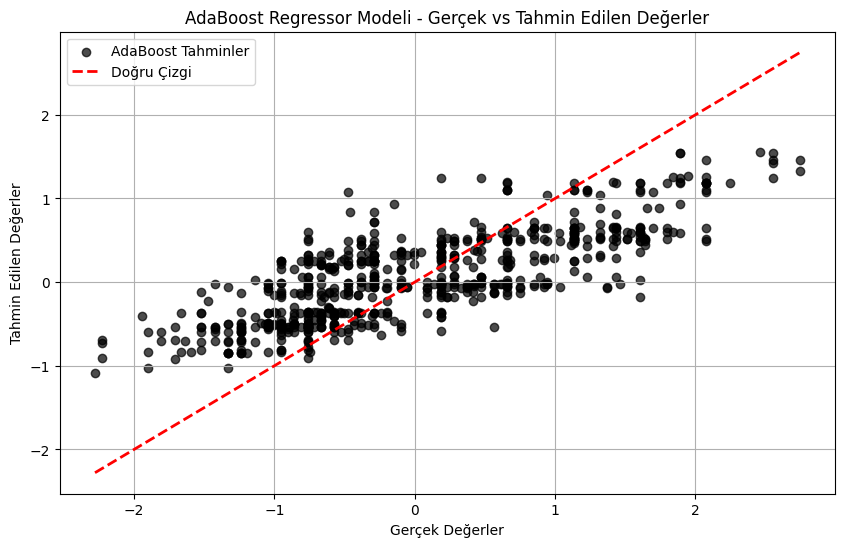

In [64]:
# Gerçek ve tahmin edilen değerleri karşılaştırmak için bir grafik çizelim
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_ada_pred, alpha=0.7, color='black', label='AdaBoost Tahminler')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', lw=2, linestyle='--', label='Doğru Çizgi')

plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('AdaBoost Regressor Modeli - Gerçek vs Tahmin Edilen Değerler')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
# Performans metriklerini yazdırma
print('RandomForestRegressor MSE:', mse_rf, 'RandomForestRegressor R2:', r2_rf)
print('SVR MSE:', mse_svr, 'SVR R2:', r2_svr)
print('GradientBoostingRegressor MSE:', mse_gbr, 'GradientBoostingRegressor R2:', r2_gbr)
print('KNN MSE:', mse_knn, 'KNN R2:', r2_knn)
print('AdaBoostRegressor MSE:', mse_ada, 'AdaBoostRegressor R2:', r2_ada)

RandomForestRegressor MSE: 0.23597910032152739 RandomForestRegressor R2: 0.7577262764616131
SVR MSE: 0.34452556162412534 SVR R2: 0.6462843931725244
GradientBoostingRegressor MSE: 0.2265761416032003 GradientBoostingRegressor R2: 0.7673800543506841
KNN MSE: 0.2408189142083764 KNN R2: 0.7527573629857923
AdaBoostRegressor MSE: 0.43126546466892035 AdaBoostRegressor R2: 0.5572307470598475


In [83]:
from sklearn.model_selection import GridSearchCV

# Daha yönetilebilir bir hiperparametre ızgarası tanımlayalım
param_grid_small = {
    'n_estimators': [100, 200 ],
    'max_features': [1.0, 'sqrt'],
    'max_depth': [10, 20 ],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}


# GridSearchCV ile rastgele orman modelini optimize edelim
rf_grid_search_small = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                                    param_grid=param_grid_small,
                                    cv=3,
                                    n_jobs=-1,
                                    verbose=2)

# Modeli eğitelim
rf_grid_search_small.fit(X_train, y_train)

# En iyi hiperparametreleri gösterelim
best_params_small = rf_grid_search_small.best_params_
best_params_small

# En iyi hiperparametrelerle yeni bir model oluştur ve eğit
best_rf_model = RandomForestRegressor(random_state=42, **best_params_small)
best_rf_model.fit(X_train, y_train)

# Modelin performansını değerlendirelim
y_pred = best_rf_model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 skoru: {best_rf_model.score(X_test, y_test)}")



Fitting 3 folds for each of 64 candidates, totalling 192 fits
Mean Squared Error: 0.21774328413996125
R2 skoru: 0.7764485238218661


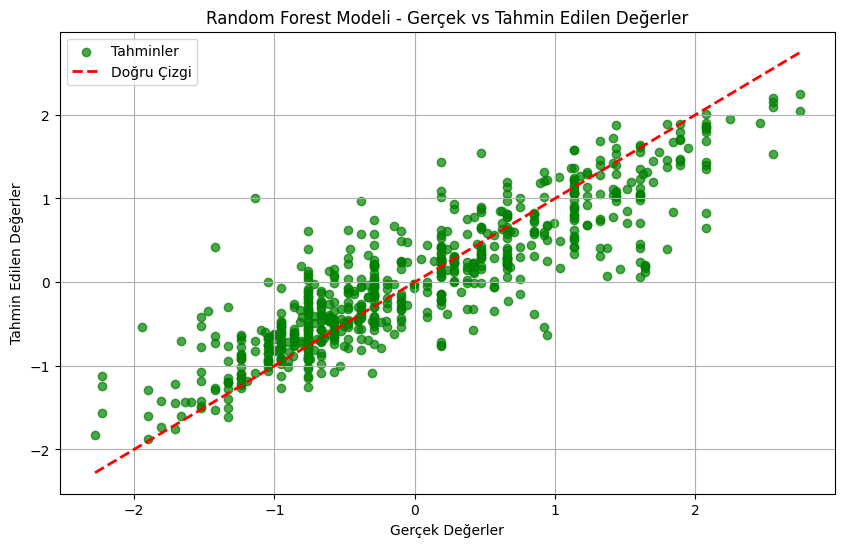

In [88]:
import matplotlib.pyplot as plt

# Gerçek ve tahmin edilen değerleri karşılaştırmak için bir grafik çizelim
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, alpha=0.7, color='g', label='Tahminler')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', lw=2, linestyle='--', label='Doğru Çizgi')

plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Random Forest Modeli - Gerçek vs Tahmin Edilen Değerler')
plt.legend()
plt.grid(True)
plt.show()



In [68]:
# Gradient Boosting Regressor için hiperparametre ızgarasını tanımlayın
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# GridSearchCV ile Gradient Boosting Regressor modelini optimize edin
gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Modeli eğitin
grid_search.fit(X_train, y_train)

# En iyi hiperparametreleri gösterin
best_params = grid_search.best_params_
print("En iyi hiperparametreler:", best_params)

# En iyi model ile tahminler yapın
best_gbr_model = grid_search.best_estimator_
y_pred_best_gbr = best_gbr_model.predict(X_test)

# Model performansını değerlendirin
mse_best_gbr = mean_squared_error(y_test, y_pred_best_gbr)
r2_best_gbr = r2_score(y_test, y_pred_best_gbr)

print('Gradient Boosting En İyi Model Mean Squared Error:', mse_best_gbr)
print('Gradient Boosting En İyi Model R-squared:', r2_best_gbr)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
En iyi hiperparametreler: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.9}
Gradient Boosting En İyi Model Mean Squared Error: 0.1286733585367168
Gradient Boosting En İyi Model R-squared: 0.8678943446669444


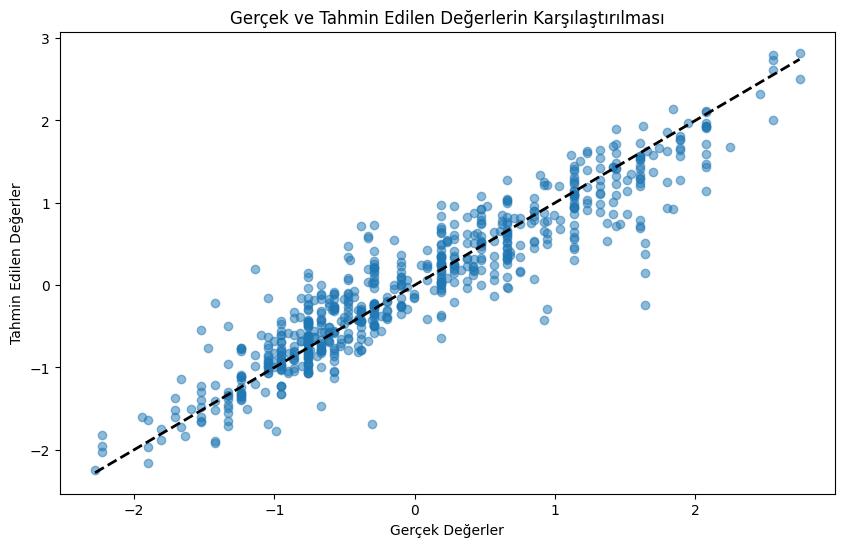

In [76]:
# Tahmin ve gerçek değerleri karşılaştıran bir grafik oluştur
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_gbr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Karşılaştırılması')
plt.show()

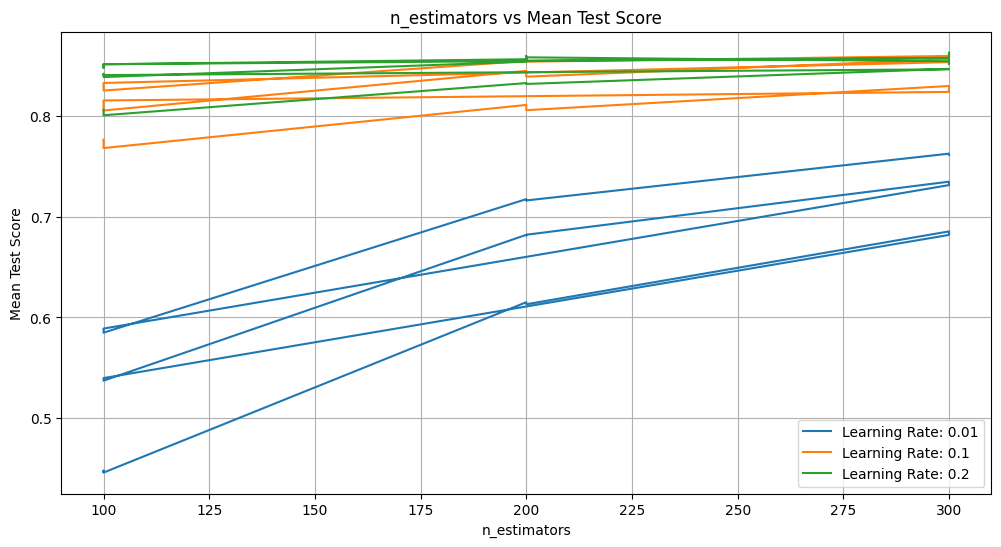

In [89]:
# Grid Search sonuçlarını bir DataFrame olarak alalım
results = pd.DataFrame(grid_search.cv_results_)

# n_estimators'a göre performans grafiği
plt.figure(figsize=(12, 6))
for learning_rate in param_grid['learning_rate']:
    subset = results[results['param_learning_rate'] == learning_rate]
    plt.plot(subset['param_n_estimators'], subset['mean_test_score'], label=f'Learning Rate: {learning_rate}')
plt.xlabel('n_estimators')
plt.ylabel('Mean Test Score')
plt.title('n_estimators vs Mean Test Score')
plt.legend()
plt.grid(True)
plt.show()



Yukarıdaki Grafik, farklı learning_rate değerlerinin ve n_estimators sayısının model performansını nasıl etkilediğini net bir şekilde gösteriyor. Düşük öğrenme oranı (0.01) ile daha fazla ağaç kullanımı performansı artırıyor, ancak başlangıç performansı düşük. Orta (0.1) ve yüksek (0.2) öğrenme oranları ise daha az ağaç ile yüksek performans sağlıyor.

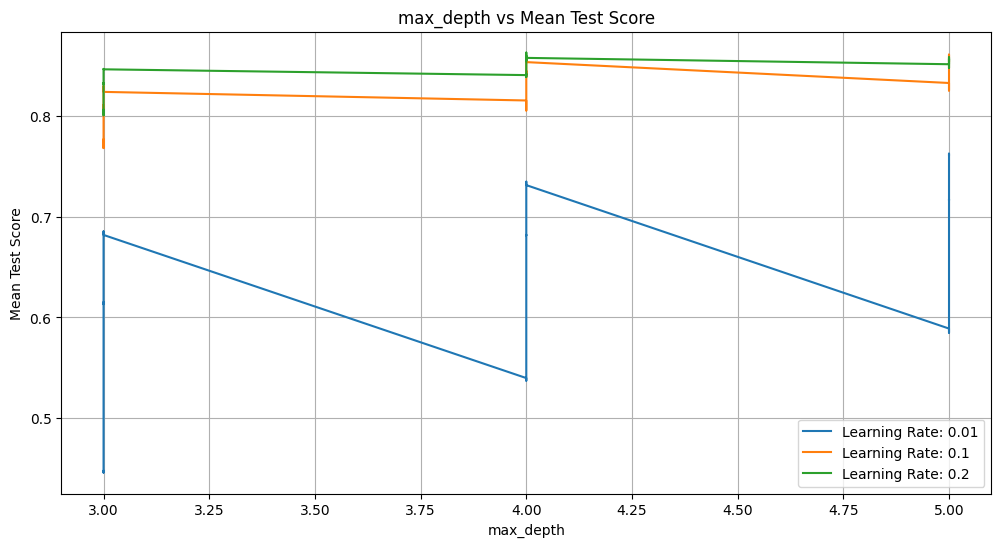

In [79]:
# max_depth'a göre performans grafiği
plt.figure(figsize=(12, 6))
for learning_rate in param_grid['learning_rate']:
    subset = results[results['param_learning_rate'] == learning_rate]
    plt.plot(subset['param_max_depth'], subset['mean_test_score'], label=f'Learning Rate: {learning_rate}')
plt.xlabel('max_depth')
plt.ylabel('Mean Test Score')
plt.title('max_depth vs Mean Test Score')
plt.legend()
plt.grid(True)
plt.show()



Yukarıdaki Grafik, karar ağaçlarının maksimum derinliğinin model performansını nasıl etkilediğini gösteriyor. Düşük öğrenme oranı (0.01) ile, daha derin ağaçlar model performansını olumsuz etkilerken, orta ve yüksek öğrenme oranları (0.1 ve 0.2) için modelin performansı daha stabil ve genellikle daha iyi.

Öğrenme oranı ve ağaç derinliği arasındaki bu denge, modelin aşırı uyum (overfitting) veya yetersiz uyum (underfitting) yapmaması için dikkatle seçilmelidir. Bu grafik, hangi learning_rate ve max_depth kombinasyonlarının en iyi performansı verdiğini belirlemenize yardımcı olabilir. Örneğin, learning_rate 0.1 ve max_depth 3, genel olarak en iyi performansı sağlayan kombinasyon gibi görünüyor.

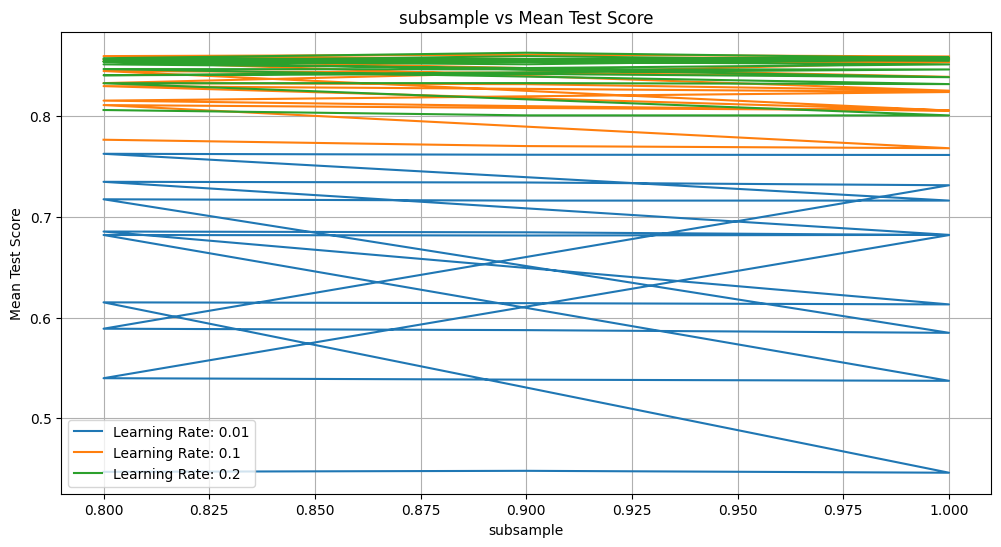

In [80]:
# subsample'a göre performans grafiği
plt.figure(figsize=(12, 6))
for learning_rate in param_grid['learning_rate']:
    subset = results[results['param_learning_rate'] == learning_rate]
    plt.plot(subset['param_subsample'], subset['mean_test_score'], label=f'Learning Rate: {learning_rate}')
plt.xlabel('subsample')
plt.ylabel('Mean Test Score')
plt.title('subsample vs Mean Test Score')
plt.legend()
plt.grid(True)
plt.show()

Yukarıdaki Grafik, örnekleme oranının (subsample) model performansını nasıl etkilediğini gösteriyor. Düşük öğrenme oranı (0.01) ile, subsample değişimlerinin performans üzerindeki etkisi daha fazla ve değişkenlik gösteriyor. Orta (0.1) ve yüksek (0.2) öğrenme oranları ile, mean_test_score genellikle daha stabil ve yüksek performans sağlıyor.

Bu grafik, hangi learning_rate ve subsample kombinasyonlarının en iyi performansı verdiğini belirlemenize yardımcı olabilir. Örneğin, learning_rate 0.1 ve 0.2 için subsample değeri 1.0'a yakın olduğunda model performansının genellikle daha iyi olduğu gözlemlenebilir. Bu, modelin aşırı uyum (overfitting) yapmadan en iyi performansı sağlamasına yardımcı olabilir.

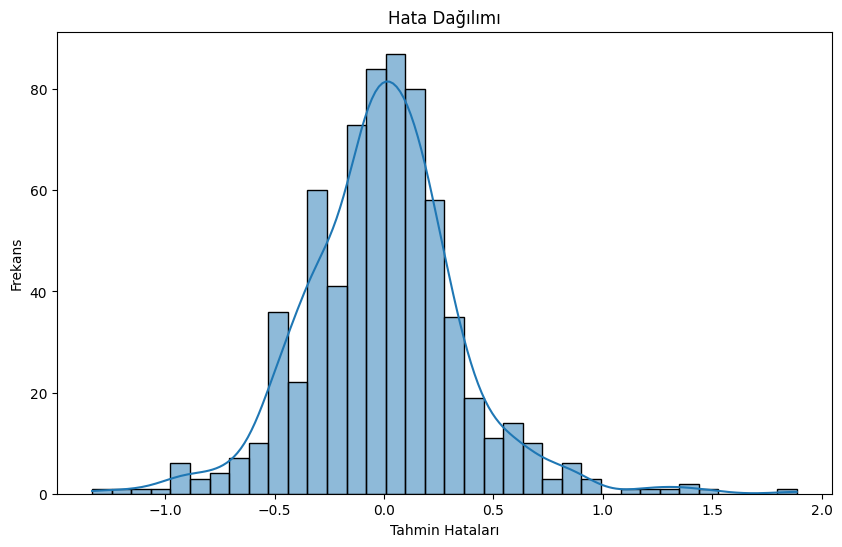

In [81]:
# Hata dağılımı grafiği
errors = y_test - y_pred_best_gbr

plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Tahmin Hataları')
plt.ylabel('Frekans')
plt.title('Hata Dağılımı')
plt.show()


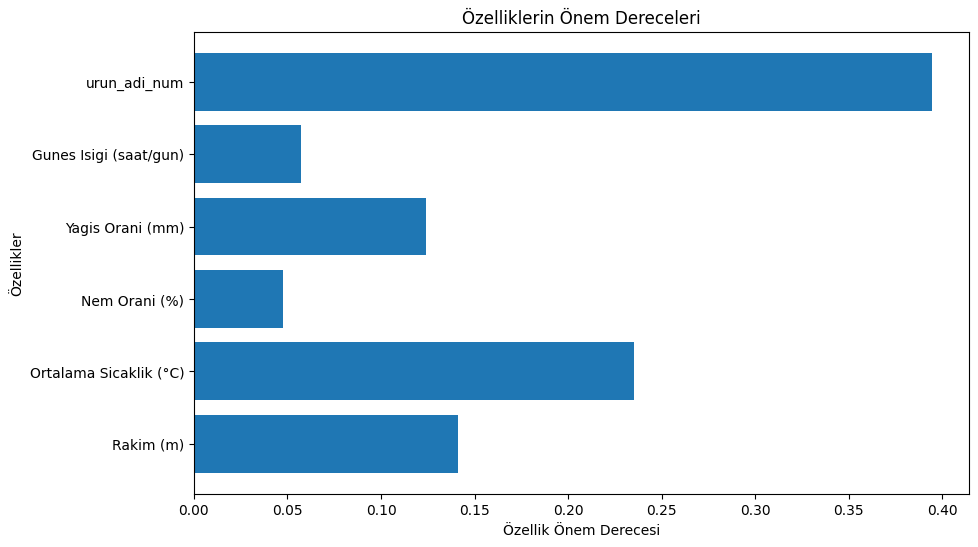

In [72]:
# Özelliklerin önem dereceleri grafiği
feature_importances = best_gbr_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Özellik Önem Derecesi')
plt.ylabel('Özellikler')
plt.title('Özelliklerin Önem Dereceleri')
plt.show()



In [73]:
df

,Yil,Il Kodu,il,ilce_kodu,ilce_adi,urun_adi,Ekilen Alan(dekar),Hasat Edilen Alan(dekar),Uretim Miktari(ton),Verim (Kg/Dekar),Rakim (m),Ortalama Sicaklik (°C),Nem Orani (%),Yagis Orani (mm),Gunes Isigi (saat/gun),urun_adi_num
0,2012,1,ADANA,1,SEYHAN,BUGDAY (DURUM) KURU,32723.335072,32688.793133,8735.332464,300,28,18.7,66,625.0,9.0,2
1,2012,1,ADANA,1,SEYHAN,BUGDAY (DURUM) SULU,32723.335072,32688.793133,8735.332464,500,28,18.7,66,625.0,9.0,3
2,2012,1,ADANA,1,SEYHAN,BUGDAY (DIGER) KURU,0.000000,0.000000,0.000000,300,28,18.7,66,625.0,9.0,0
3,2012,1,ADANA,1,SEYHAN,BUGDAY (DIGER) SULU,10000.000000,10000.000000,5000.000000,500,28,18.7,66,625.0,9.0,1
4,2012,1,ADANA,2,YUREGIR,BUGDAY (DURUM) KURU,32723.335072,32688.793133,8735.332464,324,28,18.7,66,625.0,9.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,2012,81,DUZCE,5,GUMUSOVA,BUGDAY (DIGER) KURU,1030.000000,1030.000000,258.000000,250,120,14.1,75,960.0,5.7,0
3409,2012,81,DUZCE,5,GUMUSOVA,BUGDAY (DIGER) SULU,32723.335072,32688.793133,8735.332464,300,120,14.1,75,960.0,5.7,1
3410,2012,81,DUZCE,6,KAYNASLI,BUGDAY (DURUM) KURU,32723.335072,32688.793133,8735.332464,270,200,13.6,76,1050.0,5.3,2
3411,2012,81,DUZCE,6,KAYNASLI,BUGDAY (DURUM) SULU,32723.335072,32688.793133,8735.332464,300,200,13.6,76,1050.0,5.3,3


In [ ]:
from pyvis.network import Network


# Pyvis ile network oluşturma
net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')

# "Buğday" düğümünü ekleyelim
net.add_node('Buğday', label='Buğday', title='Buğday', color='red')

# Mevcut düğümleri takip etmek için bir set oluşturalım
added_nodes = set()
added_nodes.add('Buğday')

# İller ve ilçeler için düğümleri ekleyelim
for _, row in df.iterrows():
    il = row['il']
    ilce = row['ilce_adi']
    production = row['Üretim Miktari(ton)']
    
    # İller ile Buğday düğümünü bağlayalım
    if il not in added_nodes:
        net.add_node(il, label=il, title=il, color='blue')
        net.add_edge('Buğday', il, title=f"Production: {production} ton", value=production)
        added_nodes.add(il)
    
    # İlçeleri illere bağlayalım
    if ilce not in added_nodes:
        net.add_node(ilce, label=ilce, title=f"Temperature: {row['Ortalama Sıcaklık (°C)']} °C\nRainfall: {row['Yağış Oranı (mm)']} mm\nProduction: {production} ton", color='green')
        net.add_edge(il, ilce, title=f"Production: {production} ton", value=production)
        added_nodes.add(ilce)

# Graphı HTML dosyasına kaydetme ve gösterme
net.show('turkiye_bugday_uretimi.html')

